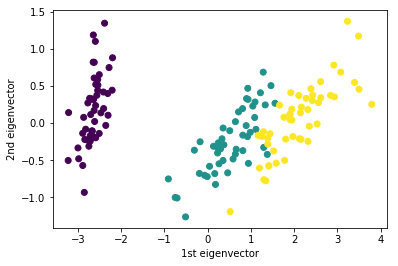

In [17]:
# Explain  how to apply the following approaches, showing the corresponding decision surfaces and
# comparing their advantages and disadvantages to each other:

# Bayes classification
# k-nearest-neighbors
# Multilayer perceptron (MLP)
# Support vector machine (SVM)

# for the classification I will use the iris flower dataset which contains 50 samples
# from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). 
# Reason for using the Iris flower dataset is that I couldn't find the Fish dataset used in the 
# assignment and since it is only a 2D-dataset I figured it would be possible to just use the flower
# dataset instead. 


# First I will introduce the dataset with a brief scatter plot

# Load data
from sklearn import datasets
iris = datasets.load_iris() # Data is now stored in iris.data and the target (correct class) is stored in iris.target

# To get a better sense of the data lets first reduce the dimensionality from 150 x 4 to 150x2 by using 
# principal components analysis (PCA)
from sklearn.decomposition import PCA
iris_reduced = PCA(n_components = 2).fit_transform(iris.data)

#Plot the data with reduced dimensionality with a scatter plot. For plotting we'll also use the iris.target, so that
# we can separate the different species
import matplotlib.pyplot as plt
plt.scatter(iris_reduced[:,0],iris_reduced[:,1], c = iris.target, cmap = 'viridis')
plt.xlabel("1st eigenvector")
plt.ylabel("2nd eigenvector")
plt.show()





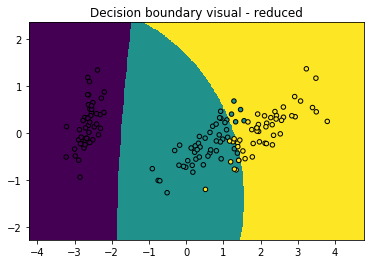

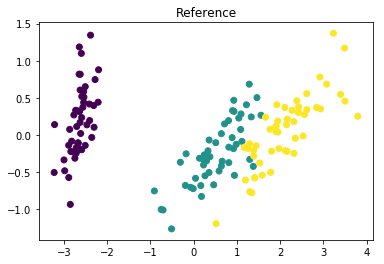

In [88]:
# Study: Bayes classification
# Fit a bayes model and predict the labels

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

X_red = iris_reduced # Use the PCA reduced dataset
y = iris.target

clf = gnb.fit(X_red,y)


# Plot the decision boundary with a mesh grid so that it can be visually seen
x_min_red, x_max_red = X_red[:, 0].min() - 1, X_red[:, 0].max() + 1
y_min_red, y_max_red = X_red[:, 1].min() - 1, X_red[:, 1].max() + 1

xx_red, yy_red = np.meshgrid(np.arange(x_min_red, x_max_red, h),
                    np.arange(y_min_red,y_max_red,h))
Z_red = clf.predict(np.c_[xx_red.ravel(),yy_red.ravel()])


# Use a color plot to visualize the decision boundaries
Z_red = Z_red.reshape(xx_red.shape)
plt.pcolormesh(xx_red,yy_red,Z_red,cmap = 'viridis')

# Plot the training points to the figure
plt.scatter(X_red[:,0], X_red[:,1],c =y, cmap = 'viridis',  edgecolor='k', s=20)
plt.title('Decision boundary visual - reduced')
plt.show()

# Plot reference
plt.scatter(iris_reduced[:,0], iris_reduced[:,1], c =iris.target, cmap = 'viridis')
plt.title('Reference')
plt.show()


# Give the Bayes formula, introduce its components, and present an algorithm for the classification of two
# categories, based on the formula. 

# The bayes classification is based of the bayes theorem which states
# Posterior = (Likelyhood * Prior)/ Evidence --> P(w|x) = [P(x|w) * P(x)] / P(x)

# By using the bayes rule and the normal density function (where we use mean and variance - or covariance 
# for multidimensional case) we can calculate the posterior probability that a single observation will belong
# to some class. After calculating the probability we can apply a decision rule which states that if P(w1) > P(w2)
# we choose w1 and vice versa. From this we are able to create a statistical bayes classifier

# Bayes classification strategy
# First step is to create the probability density function, and for that we need to calculate the 
# parameters for normal density function which are mean and variance
# Next we would have to create the discriminant functions - with the appropriate parameters - and set them 
# equal to zero to find the different decision boundaries (for the iris dataset we would have three different 
# discrimination functions) 

# We would need to solve
# g1-g2 = 0
# g1- g3 = 0
# g2 - g3 = 0

# --> From here we would have three different decision boundaries that we could represent and also use for predicting
# unseen data



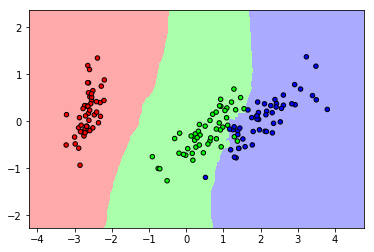

In [86]:
# Applying k-nearest neigbors on the Iris dataset. For the classification we use the reduced dataset
import numpy as np # USed for the mesh grid
from matplotlib.colors import ListedColormap
from sklearn import neighbors


X = iris_reduced
y = iris.target
n_neighbors = 5 # Amount of neighbors that cast a vote
h = 0.02 # Step size of the mesh

# Create colormap for the plots
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Fit the data
# For the classifier we use uniform weights which means that the value assigned to a query point 
# is computed from a simple majority vote of the nearest neighbors.

clf = neighbors.KNeighborsClassifier(n_neighbors, weights = 'uniform')
clf.fit(iris_reduced, iris.target)

# Plot the decision boundary with a mesh grid so that it can be visually seen
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min,y_max,h))
Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])


# Use a color plot to visualize the decision boundaries
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx,yy,Z,cmap = cmap_light)

# Plot the training points to the figure
plt.scatter(X[:,0], X[:,1],c =y, cmap = cmap_bold, edgecolor='k', s=20)
plt.show()




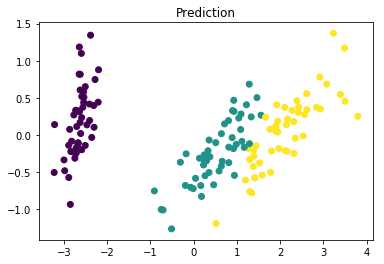

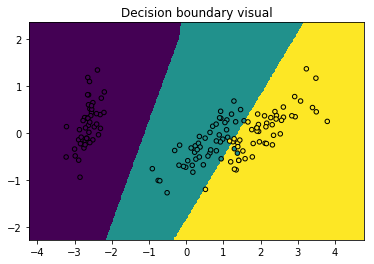

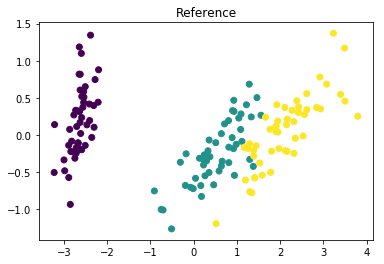

In [58]:
# Apply MLP to create a classification of the dataset

from sklearn.neural_network import MLPClassifier

# Use the Iris data again

X = iris_reduced
y = iris.target

# Create the classifier
clf = MLPClassifier(solver = 'lbfgs', hidden_layer_sizes = (5,2),
                   random_state = 1)

clf.fit(X,y)
predictions = clf.predict(X)

# Plot the prediction result
plt.scatter(X[:,0],X[:,1], c =predictions , cmap= 'viridis')
plt.title('Prediction')
plt.show()


# Plot the decision boundary with a mesh grid so that it can be visually seen
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min,y_max,h))
Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])


# Use a color plot to visualize the decision boundaries
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx,yy,Z,cmap = 'viridis')

# Plot the training points to the figure
plt.scatter(X[:,0], X[:,1],c =y, cmap = 'viridis',  edgecolor='k', s=20)
plt.title('Decision boundary visual')
plt.show()

# Plot reference
plt.scatter(iris_reduced[:,0], iris_reduced[:,1], c =iris.target, cmap = 'viridis')
plt.title('Reference')
plt.show()


# Source = http://scikit-learn.org/stable/modules/neural_networks_supervised.html


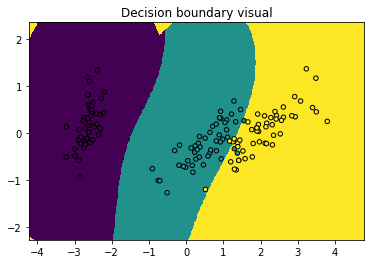

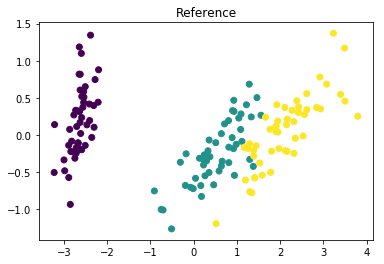

In [89]:
# Applying SVM to the Iris dataset

from sklearn import svm

X = iris_reduced
y = iris.target

# Create a SVM classifier

clf = svm.SVC()
clf.fit(X,y)

# Create the predictions
clf.predict(X)


# Plot the decision boundary with a mesh grid so that it can be visually seen
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min,y_max,h))
Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])


# Use a color plot to visualize the decision boundaries
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx,yy,Z,cmap = 'viridis')

# Plot the training points to the figure
plt.scatter(X[:,0], X[:,1],c =y, cmap = 'viridis',  edgecolor='k', s=20)
plt.title('Decision boundary visual')
plt.show()

# Plot reference
plt.scatter(iris_reduced[:,0], iris_reduced[:,1], c =iris.target, cmap = 'viridis')
plt.title('Reference')
plt.show()


# source: http://scikit-learn.org/stable/modules/svm.html


# Tell how to apply SVM to the given problem.
# SVM's are binary classifiers (can also be used for multiple classes as in the example) and their decision boundaries
# are defined by support vectors. Support vectors are the training samples that determine the optimal separating hyperplane
# (or hypersurface in higher dimensions). Boundary is formed using only few training samples, and Only “difficult points” 
# close to the boundary influence the optimality, not all points (like in other methods). 

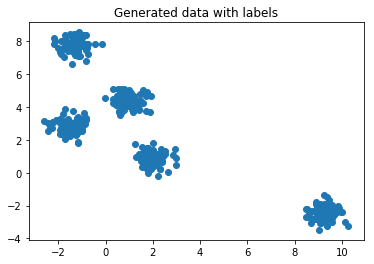

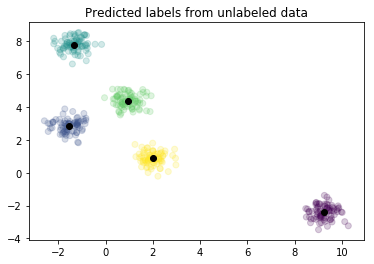

In [107]:
# C-means / K-means algorithm
# K-means is a method for unsupervised learning and cluster detection. The idea is to find 
# 'similar' groupings of datapoints based on some similarity measure - often distance. Usually the 
# idea behind K-means is to find cluster centroids by first initializing random centroids, then creating a 
# classification based on the initialization, re-evaluating the centroid positions and iterating until no 
# change occurs. The same method is used in expectation maximization -algorithm. 

# Demonstrate k-means with a generated dataset

from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=400, centers = 5, 
                      cluster_std = 0.4, random_state = 0)

# Plot the blobs with a scatter plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1])
plt.title('Generated data with labels')
plt.show()

# For running the k-means algorithm we don't need to know the labels before hand. In essence there is no real
# learning - or mapping - but instead k-means works by assigning the different centroids and then iterating to find 
# the centers of each data blob. For running kmeans, we need to know the amount of clusters/centroids beforehand.
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, random_state=0).fit(X) #created the kmeans 'handle'
#Plot the predictions
pred = kmeans.predict(X) # Create the predictions
plt.scatter(X[:,0],X[:,1],c=pred,cmap='viridis', alpha = 1/5) # Use the alpha to create opaque effect so that 
                                                              # cluster centers are more easily seen
plt.title('Predicted labels from unlabeled data')

#Plot also the centroids with black dot
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1], c='black')

plt.show()





